In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
pd.options.display.max_rows = 9999
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from datetime import datetime

import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

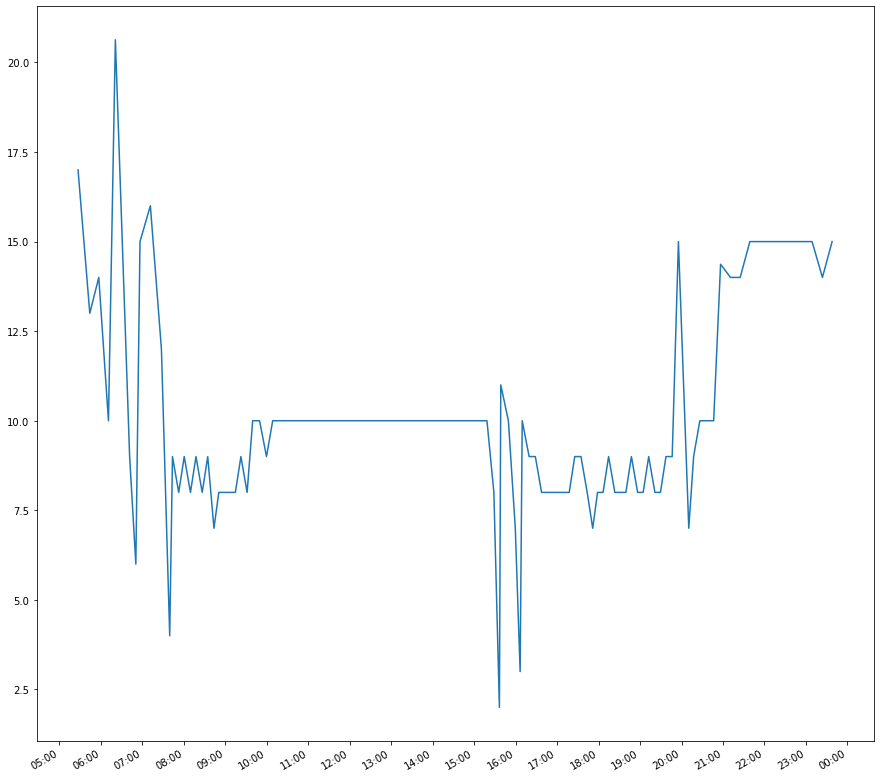

In [4]:
stop_times = pd.read_csv("data/gtfs3Sept/stop_times.txt")
stop_times.head()
stop_id = '5271F'
trip_id = '236487051'
stop_times = stop_times.loc[stop_times['stop_id'] == stop_id	].sort_values(by='arrival_time',ascending = True)
stop_times = stop_times[stop_times['trip_id'].astype(str).str.contains(trip_id)]
# stop_times
intervals_array = []

for i in range(len(stop_times['arrival_time'].values)):
    try:
        intervals_array.append((datetime.strptime(stop_times['arrival_time'].values[i+1], "%H:%M:%S")-datetime.strptime(stop_times['arrival_time'].values[i], "%H:%M:%S")).total_seconds()/60)
    except IndexError:
        intervals_array.append(0)
    except ValueError:
        ##这里讨论24小时以上问题
        intervals_array.append(0)  
# print(intervals_array)

# stop_times.assign(intervals=intervals_array)
stop_times['intervals']=intervals_array

stop_times

#delete rows to test:
stop_times = stop_times.drop(1989548)
stop_times = stop_times.drop(1989579)
stop_times = stop_times.drop(1989642)
stop_times = stop_times.drop(1989737)
stop_times = stop_times.drop(1989768)
stop_times = stop_times.drop(1987917)

stop_times


stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'],format='%H:%M:%S')


fig, ax = plt.subplots(figsize=(15,15))
                                                               
plt.plot('arrival_time', 'intervals', data=stop_times)                                         
                                                               
ax.set_xlim(stop_times['arrival_time'].min()-pd.Timedelta(1,'h'),
            stop_times['arrival_time'].max()+pd.Timedelta(1,'h'))

ax.xaxis.set_major_locator(md.HourLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

fig.autofmt_xdate()

plt.show()

## Group Time Series Data

In [24]:
stop_times['arrival_time'].values.reshape(-1,1)

array([['1900-01-01T05:26:52.000000000'],
       ['1900-01-01T05:43:52.000000000'],
       ['1900-01-01T05:56:52.000000000'],
       ['1900-01-01T06:10:52.000000000'],
       ['1900-01-01T06:20:52.000000000'],
       ['1900-01-01T06:41:30.000000000'],
       ['1900-01-01T06:50:30.000000000'],
       ['1900-01-01T06:56:30.000000000'],
       ['1900-01-01T07:11:30.000000000'],
       ['1900-01-01T07:27:30.000000000'],
       ['1900-01-01T07:39:30.000000000'],
       ['1900-01-01T07:43:30.000000000'],
       ['1900-01-01T07:52:30.000000000'],
       ['1900-01-01T08:00:30.000000000'],
       ['1900-01-01T08:09:30.000000000'],
       ['1900-01-01T08:17:30.000000000'],
       ['1900-01-01T08:26:30.000000000'],
       ['1900-01-01T08:34:30.000000000'],
       ['1900-01-01T08:43:30.000000000'],
       ['1900-01-01T08:50:30.000000000'],
       ['1900-01-01T08:58:30.000000000'],
       ['1900-01-01T09:06:30.000000000'],
       ['1900-01-01T09:14:30.000000000'],
       ['1900-01-01T09:22:30.00000

In [23]:
stop_times["intervals"].values

array([17.        , 13.        , 14.        , 10.        , 20.63333333,
        9.        ,  6.        , 15.        , 16.        , 12.        ,
        4.        ,  9.        ,  8.        ,  9.        ,  8.        ,
        9.        ,  8.        ,  9.        ,  7.        ,  8.        ,
        8.        ,  8.        ,  8.        ,  9.        ,  8.        ,
       10.        , 10.        ,  9.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
        8.        ,  2.        , 11.        , 10.        ,  7.        ,
        3.        , 10.        ,  9.        ,  9.        ,  8.  

In [10]:
print(np.quantile(stop_times["intervals"].values,0.25))
print(np.quantile(stop_times["intervals"].values,0.75))

8.0
10.0


## KNN Regressor

In [54]:
model = KNeighborsRegressor(n_neighbors=3, weights="uniform").fit(stop_times['arrival_time'].values.reshape(-1,1),stop_times["intervals"])

In [55]:
pred = model.predict(stop_times['arrival_time'].values.reshape(-1,1))

In [64]:
print(np.quantile(pred,0.2))
print(np.quantile(pred,0.8))

8.333333333333334
10.333333333333334


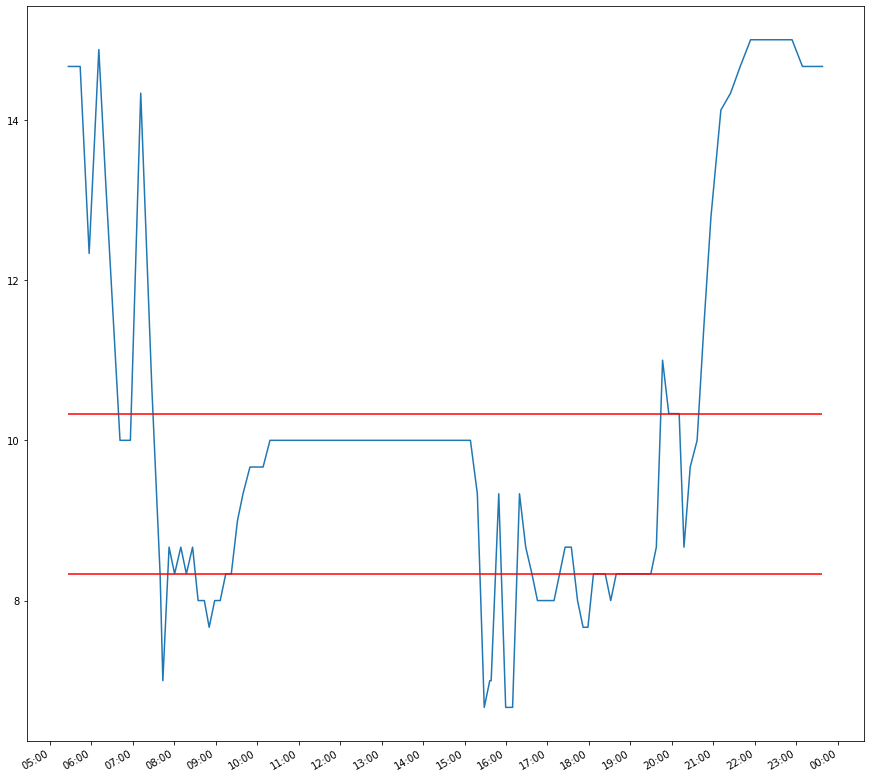

In [67]:
fig, ax = plt.subplots(figsize=(15,15))
                                                               
plt.plot(stop_times["arrival_time"],pred)                                         
                                                               
ax.set_xlim(stop_times['arrival_time'].min()-pd.Timedelta(1,'h'),
            stop_times['arrival_time'].max()+pd.Timedelta(1,'h'))

ax.hlines(np.quantile(pred,0.2),xmin=stop_times['arrival_time'].min(),xmax=stop_times['arrival_time'].max(),colors="r")
ax.hlines(np.quantile(pred,0.8),xmin=stop_times['arrival_time'].min(),xmax=stop_times['arrival_time'].max(),colors="r")

ax.xaxis.set_major_locator(md.HourLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

fig.autofmt_xdate()

plt.show()

## Kernel Density Estimation Smoothing

<AxesSubplot:ylabel='Count'>

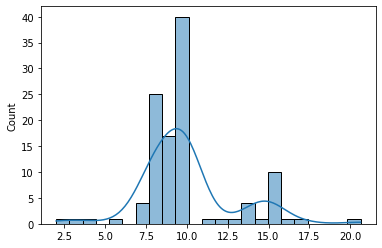

In [70]:
sns.histplot((stop_times["intervals"].values),kde=True)

## Exponential Smoothing

## Decompose Seasonality from Timeseries?

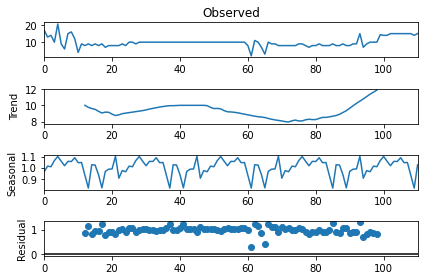

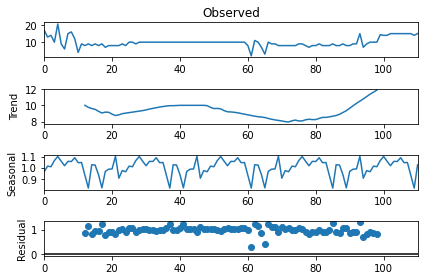

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stop_times["intervals"].values,model = "multiplicable",period=24)
result.plot()